In [1]:
from PIL import Image
import numpy as np

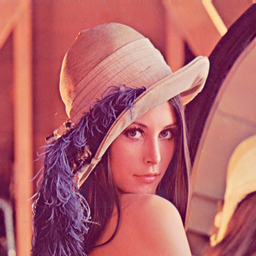

In [2]:
# 計算対象画像を読み込み
img = Image.open('Lenna.bmp')
img

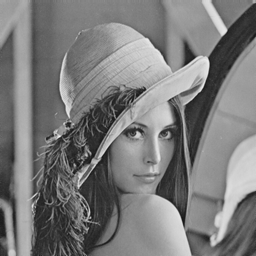

In [3]:
# グレースケール変換
gray_img = img.convert('L')
gray_img

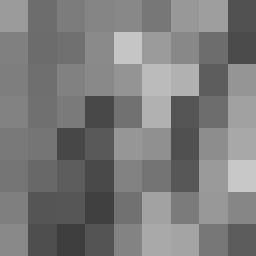

In [4]:
# 9 x 8サイズへ縮小
small_gray_img = gray_img.resize([9, 8], Image.ANTIALIAS)
small_gray_img.resize([256, 256]).save('Lenna_gray_small.bmp')
small_gray_img.resize([256, 256])

In [5]:
# 右隣のピクセルと値を比較して、dHashを算出
dhash_array = [[] for _ in range(8)]
for y in range(0, 8):
    for x in range(0, 8):
        dhash_val = 1 if small_gray_img.getpixel((x, y)) < small_gray_img.getpixel((x + 1, y)) else 0
        dhash_array[y].append(dhash_val)
dhash_array

[[0, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 1, 0, 1, 1],
 [0, 0, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 0, 0]]

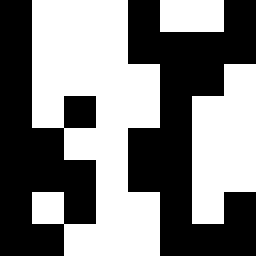

In [6]:
# 0を黒、1を白にして表示
Image.fromarray((np.matrix(dhash_array) * 255).astype('uint8'), 'L').resize((256, 256))

In [7]:
dhash = np.asarray(dhash_array).flatten()
''.join(str(val) for val in dhash)

'0111011001110000011110010101101100110011000100110101101000111000'

In [8]:
def to_hex(hash_array):
    hex_str = ''
    for array in hash_array:
        hash_val = int("".join(str(val) for val in array), 2)
        hex_str += hex(hash_val)[2:].rjust(2, '0')
    return hex_str

In [9]:
to_hex(dhash_array)

'7670795b33135a38'

In [10]:
# 今までの計算を1つの関数にまとめる
def dhash(path):
    img = Image.open(path)
    gray_img = img.convert('L')
    small_gray_img = gray_img.resize([9, 8], Image.ANTIALIAS)

    dhash_array = [[] for _ in range(8)]
    for y in range(0, 8):
        for x in range(0, 8):
            dhash_val = 1 if small_gray_img.getpixel((x, y)) < small_gray_img.getpixel((x + 1, y)) else 0
            dhash_array[y].append(dhash_val)
    
    return dhash_array

In [11]:
dhash1 = dhash('Lenna.bmp')
to_hex(dhash1)

'7670795b33135a38'

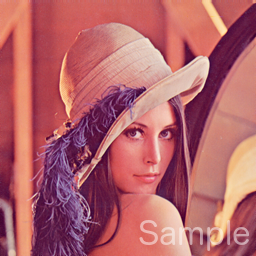

In [12]:
Image.open('Lenna2.bmp')

In [13]:
dhash2 = dhash('Lenna2.bmp')
to_hex(dhash2)

'7670795b33135a38'

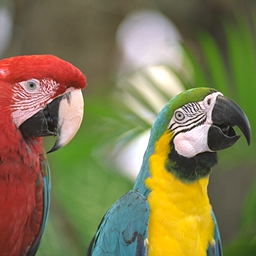

In [14]:
Image.open('Parrots.bmp')

In [15]:
dhash3 = dhash('Parrots.bmp')
to_hex(dhash3)

'59199958d0f9ecec'

In [16]:
def calc_distance(dhash1, dhash2):
    distance = 0
    for y in range(len(dhash1)):
        for x in range(len(dhash2)):
            if dhash1[y][x] != dhash2[y][x]:
                distance += 1
    return distance

In [17]:
calc_distance(dhash1, dhash2)

0

In [18]:
calc_distance(dhash1, dhash3)

33